<a href="https://colab.research.google.com/github/mimilazarova/DD2424-covid-xray-project/blob/master/playground_colab_mimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import os


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

with open('/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/data/trainX1.pickle', 'rb') as f:
  X1 = pickle.load(f)
with open('/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/data/trainX2.pickle', 'rb') as f:
  X2 = pickle.load(f)

trainX = np.concatenate((X1, X2))

with open('/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/data/testX.pickle', 'rb') as f:
  testX = pickle.load(f)
with open('/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/data/train_y.pickle', 'rb') as f:
  train_y = pickle.load(f)
with open('/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/data/test_y.pickle', 'rb') as f:
  test_y = pickle.load(f)

N = trainX.shape[0]
testN = testX.shape[0]

trainX = trainX.reshape((N, 224, 224, 1))
testX = testX.reshape((testN, 224, 224, 1))

trainX, valX, train_y, val_y = train_test_split(trainX, train_y, test_size=0.2, random_state=42, shuffle=True, stratify=None)

# print(sum(train_y==0)/len(train_y))
# print(sum(train_y==1)/len(train_y))
# print(sum(train_y==2)/len(train_y))

# print(sum(val_y==0)/len(val_y))
# print(sum(val_y==1)/len(val_y))
# print(sum(val_y==2)/len(val_y))

# args = [train_y==0]
# X0, vX0, y0, vy0 = train_test_split(trainX[args], train_y[args],  test_size=0.1, random_state=42) 

# args = [train_y==1]
# X1, vX1, y1, vy1 = train_test_split(trainX[args], train_y[args],  test_size=0.1, random_state=42) 

# args = [train_y==2]
# X2, vX2, y2, vy2 = train_test_split(trainX[args], train_y[args],  test_size=0.1, random_state=42) 

# trainX = np.concatenate((X0, X1, X2))
# train_y = np.concatenate((y0, y1, y2))

# valX = np.concatenate((vX0, vX1, vX2))
# val_y = np.concatenate((vy0, vy1, vy2))

trainX.shape

(10855, 224, 224, 1)

In [0]:
bs = 16
init_lr = 2e-4
nepoch = 20
N = len(train_y)

optimizer = keras.optimizers.Adam(init_lr)

class_weights = {}
# for c in range(3):
#   class_weights[c] = 1000/np.sum(train_y==c)
#   print(class_weights[c])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

aug = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.01, horizontal_flip=True,
                         vertical_flip=False, fill_mode="nearest")


In [0]:
# ids = np.arange(np.sum(train_y==1))
# choices = np.random.choice(ids, np.sum(train_y==0))

# X1 = X1[choices]
# y1 = y1[choices]

# ids = np.arange(np.sum(train_y==2))
# choices = np.random.choice(ids, np.sum(train_y==0))

# X2 = X2[choices]
# y2 = y2[choices]

# trainX_balanced = np.concatenate((X0, X1, X2))
# train_y_balanced = np.concatenate((y0, y1, y2))
# trainX_balanced.shape

In [0]:
# one-hot-encoded vectors, not sure it we need them, the fitting the models with them did not work for me

# trainY = np.zeros((N, 3))
# testY = np.zeros((testN, 3))

# trainY[np.arange(N), train_y] = 1
# testY[np.arange(testN), test_y] = 1


In [0]:
model2 = keras.models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(224, 224, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(3))

class_weights[0] = 1
class_weights[1] = 2
class_weights[2] = 10

model2.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




# history2 = model2.fit(trainX, train_y, batch_size = bs, epochs= nepoch,  callbacks=[early_stopping],
#                     class_weight=class_weights, validation_data=(valX, val_y))

# history2 = model2.fit(trainX_balanced, train_y_balanced, 
#                       batch_size = bs, epochs= nepoch, 
#                       callbacks=[early_stopping],
#                       validation_data=(valX, val_y))

history2 = model2.fit(aug.flow(trainX, train_y, batch_size=bs), 
                      epochs=nepoch, callbacks=[early_stopping],
                      class_weight=class_weights,
                      steps_per_epoch = int(N/bs),
                      validation_data=(valX, val_y))

Confusion matrix:
[[74 20  6]
 [ 6 94  0]
 [ 2 18 11]]
              precision    recall  f1-score   support

           0      0.902     0.740     0.813       100
           1      0.712     0.940     0.810       100
           2      0.647     0.355     0.458        31

    accuracy                          0.775       231
   macro avg      0.754     0.678     0.694       231
weighted avg      0.786     0.775     0.764       231



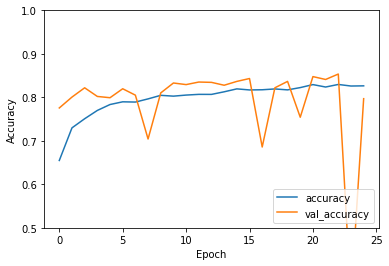

In [11]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_y_pred_m = model2.predict(testX)
test_y_pred2 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred2, labels=[0, 1, 2])
print("Confusion matrix:")
print(conf_matrix)
print(classification_report(test_y, test_y_pred2, digits=3))

In [0]:
model3 = keras.models.Sequential()
model3.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(224, 224, 1)))
model3.add(layers.MaxPooling2D((4, 4)))
model3.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model3.add(layers.MaxPooling2D((4, 4)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(3))

class_weights[0] = 1
class_weights[1] = 1
class_weights[2] = 4



model3.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# history3 = model3.fit(trainX, train_y, 
#                       batch_size = bs, epochs=nepoch,
#                       callbacks=[early_stopping],
#                       class_weight=class_weights,
#                       validation_data=(valX, val_y))

# history3 = model3.fit(trainX_balanced, train_y_balanced, 
#                       batch_size = bs, epochs=nepoch, 
#                       callbacks=[early_stopping],
#                       validation_data=(valX, val_y))

history3 = model3.fit(aug.flow(trainX, train_y, batch_size=bs), 
                      epochs=nepoch, callbacks=[early_stopping],
                      class_weight=class_weights,
                      steps_per_epoch = int(N/bs),
                      validation_data=(valX, val_y))  

plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_y_pred_m = model3.predict(testX)
test_y_pred3 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred3, labels=[0, 1, 2])
print("Confusion matrix:")
print(conf_matrix)
print(classification_report(test_y, test_y_pred3, digits=3))

In [0]:
# X_input = layers.Input((224, 224, 1))

# X = layers.Conv2D(64, (7, 7), strides=(2, 2), padding = 'same', activation='elu', kernel_initializer='he_normal')(X_input)

# X1 = layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='elu', kernel_initializer='he_normal')(X)

# pepx1 = layers.Conv2D(16, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(X1)
# pepx1 = layers.Conv2D(256, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx1)
# pepx1 = layers.DepthwiseConv2D(16, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx1)
# pepx1 = layers.Conv2D(16, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx1)
# pepx1 = layers.Conv2D(256, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx1)

# X = layers.Add()([pepx1, X1])

# X2 = layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='elu', kernel_initializer='he_normal')(X)

# pepx2 = layers.Conv2D(16, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(X2)
# pepx2 = layers.Conv2D(256, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx2)
# pepx2 = layers.DepthwiseConv2D(16, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx2)
# pepx2 = layers.Conv2D(16, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx2)
# pepx2 = layers.Conv2D(256, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx2)


# X = layers.Add()([pepx2, X2])
# X3 = layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='elu', kernel_initializer='he_normal')(X)

# pepx3 = layers.Conv2D(16, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(X3)
# pepx3 = layers.Conv2D(256, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx3)
# pepx3 = layers.DepthwiseConv2D(16, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx3)
# pepx3 = layers.Conv2D(16, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx3)
# pepx3 = layers.Conv2D(256, (1, 1), padding='same', activation='elu', kernel_initializer='he_normal')(pepx3)

# X = layers.Flatten()(pepx3)
# X = layers.Dense(128, activation='elu', kernel_initializer='he_normal')(X)
# X = layers.Dense(32, activation='elu', kernel_initializer='he_normal')(X)
# X = layers.Dense(3, activation='softmax', kernel_initializer='he_normal')(X)

# model5 = keras.models.Model(inputs=X_input, outputs=X)
# model5.summary()

In [0]:
# for c in range(3):
#   class_weights[c] = np.sum(train_y==(2-c))/N
#   print(class_weights[c])


# model5.compile(optimizer=optimizer,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])


# # history5 = model5.fit(trainX, train_y, batch_size = bs,
# #                       epochs=5, callbacks=[early_stopping],
# #                       class_weight=class_weights, validation_data=(valX, val_y))  

# history5 = model5.fit(aug.flow(trainX, train_y, batch_size = bs),
#                       epochs=5, callbacks=[early_stopping],
#                       steps_per_epoch = int(N/bs),
#                       class_weight=class_weights,
#                       validation_data=(valX, val_y))

# plt.plot(history5.history['accuracy'], label='accuracy')
# plt.plot(history5.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# test_y_pred_m = model5.predict(testX)
# test_y_pred5 = np.argmax(test_y_pred_m, axis=1)

# conf_matrix = confusion_matrix(test_y, test_y_pred5, labels=[0, 1, 2])
# print("Confusion matrix:")
# print(conf_matrix)
# print(classification_report(test_y, test_y_pred5, digits=3))


In [15]:
N = train_y.shape[0]
testN = test_y.shape[0]
for c in range(3):
  print(np.sum(test_y==c)/testN)
print("\n")
for c in range(3):
  print(np.sum(train_y==c)/N)

0.4329004329004329
0.4329004329004329
0.1341991341991342


0.5871416871416871
0.40171990171990174
0.011138411138411138


In [0]:
X_input = layers.Input((224, 224, 1))

X = layers.Conv2D(64, (7, 7), strides=(2, 2), padding = 'same', kernel_initializer='he_uniform')(X_input)
X = layers.BatchNormalization()(X)
X = layers.Activation('relu')(X)

X1 = layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', kernel_initializer='he_uniform')(X)
X1 = layers.BatchNormalization()(X1)

b1 = layers.MaxPool2D((2,2))(X) 
b1 = layers.Conv2D(16, (1, 1), padding='same', kernel_initializer='he_uniform')(b1)
b1 = layers.BatchNormalization()(b1)
b1 = layers.Activation('relu')(b1)
b1 = layers.Conv2D(256, (1, 1), padding='same', kernel_initializer='he_uniform')(b1)
b1 = layers.BatchNormalization()(b1)


X = layers.Add()([X1, b1])
X = layers.Activation('relu')(X)

X2 = layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same', kernel_initializer='he_normal')(X)
X2 = layers.BatchNormalization()(X2)

b2 = layers.MaxPool2D((2,2))(X) 
b2 = layers.Conv2D(32, (1, 1), padding='same', kernel_initializer='he_uniform')(b2)
b2 = layers.BatchNormalization()(b2)
b2 = layers.Activation('relu')(b2)
b2 = layers.Conv2D(512, (1, 1), padding='same',  kernel_initializer='he_uniform')(b2)
b2 = layers.BatchNormalization()(b2)


X = layers.Add()([X2, b2])
X = layers.Activation('relu')(X)


X = layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_uniform')(X)
X = layers.BatchNormalization()(X)
X = layers.Activation('relu')(X)
X = layers.MaxPool2D(2, 2)(X)

X = layers.Flatten()(X)
X = layers.Dense(128, kernel_initializer='he_uniform')(X)
X = layers.BatchNormalization()(X)
X = layers.Activation('relu')(X)
X = layers.Dense(3,kernel_initializer='he_uniform')(X)
X = layers.BatchNormalization()(X)
X = layers.Activation('softmax')(X)

model6 = keras.models.Model(inputs=X_input, outputs=X, name='model_6')
model6.summary()

In [0]:
class_weights[0] = 1
class_weights[1] = 1
class_weights[2] = 4


model6.compile(optimizer= optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# history6 = model6.fit(trainX, train_y,
#                       batch_size=bs, epochs=nepoch,
#                       callbacks=[early_stopping],
#                       class_weight=class_weights,
#                       validation_data=(valX, val_y))  

history6 = model6.fit(aug.flow(trainX, train_y, batch_size = bs),
                      epochs=nepoch, callbacks=[early_stopping],
                      steps_per_epoch = int(N/bs),
                      class_weight=class_weights,
                      validation_data=(valX, val_y))


Confusion matrix:
[[60  1 39]
 [ 3 68 29]
 [ 1  1 29]]
              precision    recall  f1-score   support

           0      0.938     0.600     0.732       100
           1      0.971     0.680     0.800       100
           2      0.299     0.935     0.453        31

    accuracy                          0.680       231
   macro avg      0.736     0.738     0.662       231
weighted avg      0.866     0.680     0.724       231



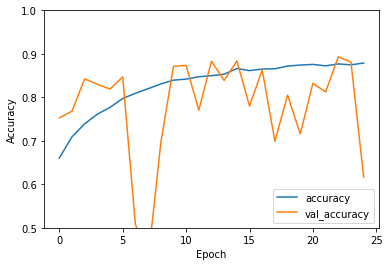

In [9]:
plt.plot(history6.history['accuracy'], label='accuracy')
plt.plot(history6.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_y_pred_m = model6.predict(testX)
test_y_pred6 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred6, labels=[0, 1, 2])
print("Confusion matrix:")
print(conf_matrix)
print(classification_report(test_y, test_y_pred6, digits=3))

In [6]:
X_input = layers.Input((224, 224, 1))

X = layers.Conv2D(64, (7, 7), strides=(2, 2), padding = 'same', kernel_initializer='he_uniform')(X_input)
X = layers.BatchNormalization()(X)
X = layers.Activation('relu')(X)

X1 = layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', kernel_initializer='he_uniform')(X)
X1 = layers.BatchNormalization()(X1)

b1 = layers.MaxPool2D((2,2))(X) 
b1 = layers.Conv2D(16, (1, 1), padding='same', kernel_initializer='he_uniform')(b1)
b1 = layers.BatchNormalization()(b1)
b1 = layers.Activation('relu')(b1)
b1 = layers.Conv2D(256, (1, 1), padding='same', kernel_initializer='he_uniform')(b1)
b1 = layers.BatchNormalization()(b1)


X = layers.Add()([X1, b1])
X = layers.Activation('relu')(X)

X2 = layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same', kernel_initializer='he_normal')(X)
X2 = layers.BatchNormalization()(X2)

b2 = layers.MaxPool2D((2,2))(X) 
b2 = layers.Conv2D(32, (1, 1), padding='same', kernel_initializer='he_uniform')(b2)
b2 = layers.BatchNormalization()(b2)
b2 = layers.Activation('relu')(b2)
b2 = layers.Conv2D(512, (1, 1), padding='same',  kernel_initializer='he_uniform')(b2)
b2 = layers.BatchNormalization()(b2)


X = layers.Add()([X2, b2])
X = layers.Activation('relu')(X)

X3 = layers.Conv2D(1024, (3, 3), strides=(2, 2), padding='same', kernel_initializer='he_normal')(X)
X3 = layers.BatchNormalization()(X3)

b3 = layers.MaxPool2D((2,2))(X) 
b3 = layers.Conv2D(64, (1, 1), padding='same', kernel_initializer='he_uniform')(b3)
b3 = layers.BatchNormalization()(b3)
b3 = layers.Activation('relu')(b3)
b3 = layers.Conv2D(1024, (1, 1), padding='same',  kernel_initializer='he_uniform')(b3)
b3 = layers.BatchNormalization()(b3)


X = layers.Add()([X3, b3])
X = layers.Activation('relu')(X)

X = layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_uniform')(X)
X = layers.BatchNormalization()(X)
X = layers.Activation('relu')(X)
X = layers.MaxPool2D(2, 2)(X)

X = layers.Flatten()(X)
X = layers.Dense(128, kernel_initializer='he_uniform')(X)
X = layers.BatchNormalization()(X)
X = layers.Activation('relu')(X)
X = layers.Dense(3,kernel_initializer='he_uniform')(X)
X = layers.BatchNormalization()(X)
X = layers.Activation('softmax')(X)

model7 = keras.models.Model(inputs=X_input, outputs=X, name='model_7')
model7.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 112, 112, 64) 3200        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_13 (BatchNo (None, 112, 112, 64) 256         conv2d_11[0][0]                  
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 112, 112, 64) 0           batch_normalization_13[0][0]     
____________________________________________________________________________________________

0.13948946854512484
0.2038735983690112
7.352941176470588
Epoch 1/25
1526/1526 [==============================] - 212s 139ms/step - loss: 0.2340 - accuracy: 0.5460 - val_loss: 0.9319 - val_accuracy: 0.6240
Epoch 2/25
1526/1526 [==============================] - 213s 140ms/step - loss: 0.2247 - accuracy: 0.5809 - val_loss: 0.9068 - val_accuracy: 0.6895
Epoch 3/25
1526/1526 [==============================] - 213s 139ms/step - loss: 0.2207 - accuracy: 0.5951 - val_loss: 1.0253 - val_accuracy: 0.5011
Epoch 4/25
1526/1526 [==============================] - 213s 140ms/step - loss: 0.2162 - accuracy: 0.6147 - val_loss: 1.1165 - val_accuracy: 0.3782
Epoch 5/25
1526/1526 [==============================] - 213s 140ms/step - loss: 0.2147 - accuracy: 0.6219 - val_loss: 0.8091 - val_accuracy: 0.8116
Epoch 6/25
1526/1526 [==============================] - 213s 139ms/step - loss: 0.2161 - accuracy: 0.6244 - val_loss: 1.0052 - val_accuracy: 0.5416
Epoch 7/25
1526/1526 [==============================] -

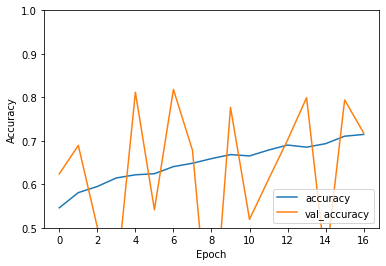

In [7]:
class_weights = {}
for c in range(3):
  class_weights[c] = 1000/np.sum(train_y==c)
  print(class_weights[c])
# class_weights[0] = 1
# class_weights[1] = 2
# class_weights[2] = 8

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)


model7.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# history7 = model7.fit(trainX, train_y,
#                       batch_size=bs, epochs=nepoch,
#                       callbacks=[early_stopping],
#                       class_weight=class_weights,
#                       validation_data=(valX, val_y))  

history7 = model7.fit(aug.flow(trainX, train_y, batch_size = bs),
                      epochs=nepoch, callbacks=[early_stopping],
                      steps_per_epoch = int(N/bs),
                      class_weight=class_weights,
                      validation_data=(valX, val_y))


plt.plot(history7.history['accuracy'], label='accuracy')
plt.plot(history7.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_y_pred_m = model7.predict(testX)
test_y_pred7 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred7, labels=[0, 1, 2])
print("Confusion matrix:")
print(conf_matrix)
print(classification_report(test_y, test_y_pred7, digits=3))

In [35]:
X_input = layers.Input((224, 224, 1))

X = layers.Conv2D(64, (7, 7), strides=(2, 2), padding = 'same', kernel_initializer='he_uniform')(X_input)
X = layers.BatchNormalization()(X)
X = layers.Activation('relu')(X)

X1 = layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', kernel_initializer='he_uniform')(X)
X1 = layers.BatchNormalization()(X1)

b1 = layers.MaxPool2D((2,2))(X) 
b1 = layers.Conv2D(16, (1, 1), padding='same', kernel_initializer='he_uniform')(b1)
b1 = layers.BatchNormalization()(b1)
b1 = layers.Activation('relu')(b1)
b1 = layers.Conv2D(256, (1, 1), padding='same', kernel_initializer='he_uniform')(b1)
b1 = layers.BatchNormalization()(b1)

X = layers.Add()([X1, b1])
X = layers.Activation('relu')(X)

X1 = layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_uniform')(X)
X1 = layers.BatchNormalization()(X1)

b1 = layers.Conv2D(16, (1, 1), padding='same', kernel_initializer='he_uniform')(b1)
b1 = layers.BatchNormalization()(b1)
b1 = layers.Activation('relu')(b1)
b1 = layers.Conv2D(256, (1, 1), padding='same', kernel_initializer='he_uniform')(b1)
b1 = layers.BatchNormalization()(b1)


X = layers.Add()([X1, b1])
X = layers.Activation('relu')(X)

X2 = layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same', kernel_initializer='he_normal')(X)
X2 = layers.BatchNormalization()(X2)

b2 = layers.MaxPool2D((2,2))(X) 
b2 = layers.Conv2D(32, (1, 1), padding='same', kernel_initializer='he_uniform')(b2)
b2 = layers.BatchNormalization()(b2)
b2 = layers.Activation('relu')(b2)
b2 = layers.Conv2D(512, (1, 1), padding='same',  kernel_initializer='he_uniform')(b2)
b2 = layers.BatchNormalization()(b2)


X = layers.Add()([X2, b2])
X = layers.Activation('relu')(X)

X2 = layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal')(X)
X2 = layers.BatchNormalization()(X2)

b2 = layers.Conv2D(32, (1, 1), padding='same', kernel_initializer='he_uniform')(b2)
b2 = layers.BatchNormalization()(b2)
b2 = layers.Activation('relu')(b2)
b2 = layers.Conv2D(512, (1, 1), padding='same',  kernel_initializer='he_uniform')(b2)
b2 = layers.BatchNormalization()(b2)

X = layers.Add()([X2, b2])
X = layers.Activation('relu')(X)

X3 = layers.Conv2D(1024, (3, 3), strides=(2, 2), padding='same', kernel_initializer='he_normal')(X)
X3 = layers.BatchNormalization()(X3)

b3 = layers.MaxPool2D((2,2))(X) 
b3 = layers.Conv2D(64, (1, 1), padding='same', kernel_initializer='he_uniform')(b3)
b3 = layers.BatchNormalization()(b3)
b3 = layers.Activation('relu')(b3)
b3 = layers.Conv2D(1024, (1, 1), padding='same',  kernel_initializer='he_uniform')(b3)
b3 = layers.BatchNormalization()(b3)


X = layers.Add()([X3, b3])
X = layers.Activation('relu')(X)

X3 = layers.Conv2D(1024, (3, 3), padding='same', kernel_initializer='he_normal')(X)
X3 = layers.BatchNormalization()(X3)

b3 = layers.Conv2D(64, (1, 1), padding='same', kernel_initializer='he_uniform')(b3)
b3 = layers.BatchNormalization()(b3)
b3 = layers.Activation('relu')(b3)
b3 = layers.Conv2D(1024, (1, 1), padding='same',  kernel_initializer='he_uniform')(b3)
b3 = layers.BatchNormalization()(b3)

X = layers.Add()([X3, b3])
X = layers.Activation('relu')(X)

X = layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_uniform')(X)
X = layers.BatchNormalization()(X)
X = layers.Activation('relu')(X)
X = layers.MaxPool2D(2, 2)(X)

X = layers.Flatten()(X)
X = layers.Dense(128, kernel_initializer='he_uniform')(X)
X = layers.BatchNormalization()(X)
X = layers.Activation('relu')(X)
X = layers.Dense(3,kernel_initializer='he_uniform')(X)
X = layers.BatchNormalization()(X)
X = layers.Activation('softmax')(X)

model8 = keras.models.Model(inputs=X_input, outputs=X, name='model_8')
model8.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 112, 112, 64) 3200        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_66 (BatchNo (None, 112, 112, 64) 256         conv2d_60[0][0]                  
__________________________________________________________________________________________________
activation_48 (Activation)      (None, 112, 112, 64) 0           batch_normalization_66[0][0]     
____________________________________________________________________________________________

In [0]:
class_weights[0] = 1
class_weights[1] = 1.2
class_weights[2] = 6

# metrics = [keras.metrics.TopKCategoricalAccuracy(), keras.metrics.Accuracy()]

dirname = "/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/"

filename = "model8-3-augmentation-{epoch:02d}-{val_accuracy:.2f}.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(dirname, filename),  
                                        monitor="val_accuracy",
                                        safe_best_only = True,
                                        verbose=1)

model8.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# history8 = model8.fit(trainX, train_y, batch_size=8,
#                       epochs=25, callbacks=[early_stopping],
#                       class_weight=class_weights, validation_data=(valX, val_y))
  
# history8 = model8.fit(trainX_balanced, train_y_balanced, 
#                       batch_size = 8, epochs=25, 
#                       callbacks=[early_stopping],
#                       validation_data=(valX, val_y))

history8 = model8.fit(aug.flow(trainX, train_y, batch_size = bs),
                      epochs=nepoch, callbacks=[early_stopping, checkpoint],
                      steps_per_epoch = int(N/bs),
                      class_weight=class_weights,
                      validation_data=(valX, val_y))



plt.plot(history8.history['accuracy'], label='accuracy')
plt.plot(history8.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#model8.save(os.path.join(dirname, filename))

val_y_pred_m = model8.predict(valX)
val_y_pred8 = np.argmax(val_y_pred_m, axis=1)

conf_matrix = confusion_matrix(val_y, val_y_pred8, labels=[0, 1, 2])
print("Validation set")
print(conf_matrix)
print(classification_report(val_y, val_y_pred8, digits=3))

test_y_pred_m = model8.predict(testX)
test_y_pred8 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred8, labels=[0, 1, 2])
print("Test set")
print(conf_matrix)
print(classification_report(test_y, test_y_pred8, digits=3))

In [0]:
dirname = "/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/"
filename = "model8-3-augmentation-16-0.78.hdf5"
m = keras.models.load_model(os.path.join(dirname, filename))

val_y_pred_m = m.predict(valX)
val_y_pred8 = np.argmax(val_y_pred_m, axis=1)

conf_matrix = confusion_matrix(val_y, val_y_pred8, labels=[0, 1, 2])
print("Validation set")
print(conf_matrix)
print(classification_report(val_y, val_y_pred8, digits=3))

test_y_pred_m = m.predict(testX)
test_y_pred8 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred8, labels=[0, 1, 2])
print("Test set")
print(conf_matrix)
print(classification_report(test_y, test_y_pred8, digits=3))

In [0]:
# filename = "/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/model8.h5"
# model8.save(filename)

In [0]:
filename = "/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/model8-16-0.91.hdf5"
loaded = keras.models.load_model(filename)
test_y_pred_m = loaded.predict(testX)
test_y_pred8 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred8, labels=[0, 1, 2])
print("Confusion matrix:")
print(conf_matrix)
print(classification_report(test_y, test_y_pred8, digits=3))

In [0]:
# loaded_model8


In [0]:
# filename = "/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/model7.h5"
# model7.save(filename)